# Block Wise Color moments

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import rgb_to_hsv
from scipy.stats import skew

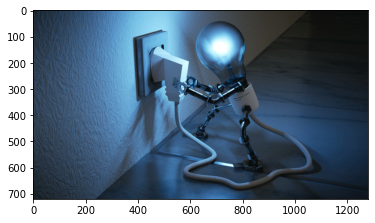

In [6]:
path=cv2.imread('Input Image.jpeg') 
pic = path
plt.imshow(pic)
plt.show()

In [7]:
pic.shape

(720, 1280, 3)

In [8]:
def mean(a):
    arr= a.reshape(-1)
    res=0
    for i in arr:
        res+=i
    res/=len(arr)
    return res

In [9]:
def std(a):
    arr= a.reshape(-1)
    mean=0
    for i in arr:
        mean+=i
    mean/=len(arr)
    res=0
    for i in arr:
        res+=(i-mean)**2
    res/=len(arr)
    res=res**(1/2)
    return res

In [10]:
def skew(a):
    arr= a.reshape(-1)
    mean=0
    for i in arr:
        mean+=i
    mean/=len(arr)
    res=0
    for i in arr:
        res+=(i-mean)**3
    res/=len(arr)
    res=res**(1/3)
    return res

In [11]:
def img_partition(img, gpc):    #function block = img_partition(img, gpc)
    [h_img, w_img] = [img.shape[0], img.shape[1]]
    sz= (img.shape[1])/(gpc[0] * gpc[1])
    block = []
    x=0
    y=0
    for i in range(int(sz)):
        for d in range(img.shape[2]):
            temp_block=[]
            for c in range(x,x+gpc[1]):
                temp_col=[]
                for r in range(y,y+gpc[1]):
                    temp_col.append(img[r][c][d])
                temp_block.append(temp_col)
            block.append(temp_block)
        x=x+gpc[0]
        y=y+gpc[1]
    block= np.array(block)
    return block

In [12]:
def extractCM(img, gpc):
# Extract Color Moments (CM) features from image
# Inputs:
#     img - image in HSV format
#     gpc - grid partition constant for CM features extraction
#
# Outputs:
#     CM  - CM features
    CM = []
    block = img_partition(img, gpc)
    for i in range(len(block)):

        # matrix to vector for each channel
        currentBlock = np.array(block[i])
        #currentBlock = cur_block.reshape(cur_block.shape[0]*cur_block.shape[1], 3)
        CM_block = []
        # 3 mean values
        curMean = mean(currentBlock)
        CM_block.append(curMean)

        # 3 variance values
        curVar = std(currentBlock)
        CM_block.append(curVar)

        # 3 skewness values
        curSkew = skew(currentBlock)
        CM_block.append(curSkew)
        CM.append(CM_block)
    return CM

In [13]:
img_hsv = rgb_to_hsv(pic)
block_size= np.array([4,4]) # 4X4 from 480X480
CM = extractCM(img_hsv, block_size)

<ipython-input-10-06773f27b165>:11: RuntimeWarning: invalid value encountered in double_scalars
  res=res**(1/3)


In [14]:
print(CM)

[[0.5652871914207935, 0.013407791906822007, 0.0073589959184027645], [0.38634595461189747, 0.05020226208739963, 0.03976119807108671], [40.0, 5.086747487343951, 5.761476762555436], [0.5782745182514191, 0.005973722707002181, nan], [0.45166479237377644, 0.05542491851850288, 0.03898100928180338], [45.3125, 3.7867986149252775, 2.8371900273993806], [0.5726295039057732, 0.006545488934713473, 0.00586734056126187], [0.44181003980338573, 0.02867019529898693, nan], [44.3125, 3.1168644099479206, 2.1757189788457336], [0.5885416567325592, 0.005208343267440796, 0.0], [0.38329168409109116, 0.03757961162836624, 0.02262806022081832], [44.625, 3.4977671449083054, 1.9189612300920182], [0.5757877081632614, 0.0007820891138126032, 0.00038083309247580665], [0.45055622793734074, 0.06201447986940953, 0.025124098207030605], [55.125, 2.368411915187052, nan], [0.5850868113338947, 0.0031380329718704203, nan], [0.5184346251189709, 0.06478038522350056, nan], [64.9375, 5.963102694906403, nan], [0.579266469925642, 0.008